https://shap.readthedocs.io/en/latest/example_notebooks/overviews/An%20introduction%20to%20explainable%20AI%20with%20Shapley%20values.html

In [1]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [2]:
import numpy as np
import pandas as pd
import shap
import sklearn

In [3]:
X, y = shap.datasets.boston()

In [7]:
X.head(2)
y[:5]

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.9,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.9,9.14


array([24. , 21.6, 34.7, 33.4, 36.2])

In [8]:
X100 = shap.utils.sample(X, 100)
model = sklearn.linear_model.LinearRegression()
model.fit(X, y)

LinearRegression()

In [9]:
for i in range(X.shape[1]):
    print(X.columns[i], "=", model.coef_[i].round(2))

CRIM = -0.11
ZN = 0.05
INDUS = 0.02
CHAS = 2.69
NOX = -17.77
RM = 3.81
AGE = 0.0
DIS = -1.48
RAD = 0.31
TAX = -0.01
PTRATIO = -0.95
B = 0.01
LSTAT = -0.52


### Partial dependence plots

In [17]:
np.mean(y) # this is the horizontal grey dotted line in the plot below
np.mean(X.RM) # vertical dotted line

22.532806324110677

6.284634387351779

The blue line is the partial dependence plot line which is the average value of the model output when we fix RM to a given value always passes through the interesection of the grey lines. This intersection is the center of the partial dependence wrt the data distribution

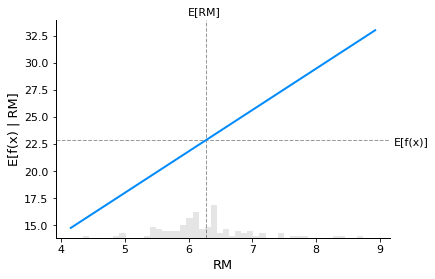

In [10]:
shap.plots.partial_dependence(
    "RM", model.predict, X100, ice=False, model_expected_value=True, feature_expected_value=True
)

The core idea behine shapely values is to use fair allocation results from cooperative game theory to allocate credit for an output to among its input features. we match the inputs with players i a game and match the model function with the rules of the game. we say that a feature has joined the model or that a player has joined a game if we know the value of the feature and has not joined a model when we don't know the value of the feature. 

To evaluate an existing model $f$, when only a subset $S$ of features are a part of the model, we integrate out the other features usign a conditional expected value formulation

$$
E[f(X) | X_s = x_s]
$$

$$
or
$$

$$
E[f(X) | do(X_s = x_s)]
$$

In [11]:
explainer = shap.Explainer(model.predict, X100)
shap_values = explainer(X)

In [23]:
len(shap_values)

X.shape

506

(506, 13)

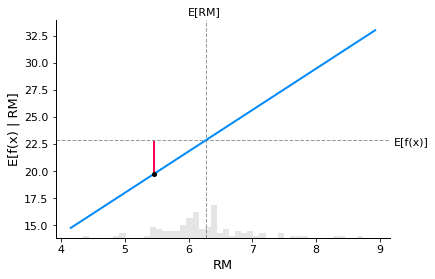

In [12]:
sample_ind = 18 # to make a standard partial dependence plot
shap.partial_dependence_plot(
    "RM", model.predict, X100, model_expected_value=True, feature_expected_value=True,
    ice=False, shap_values=shap_values[sample_ind:sample_ind+1, :]
)

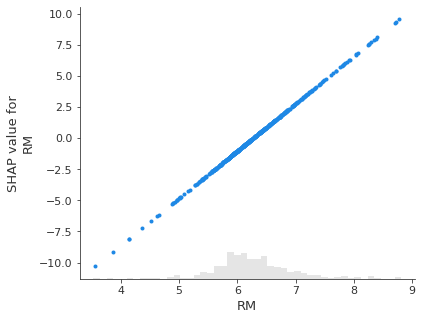

In [19]:
shap.plots.scatter(shap_values[:, "RM"])

In [32]:
model.predict(X.iloc[[18]])

array([16.17801106])

In [33]:
shap_values[18]

.values =
array([ 0.29059334, -0.57816681, -0.04899326, -0.16120403,  0.2343416 ,
       -3.09292477, -0.02126306,  0.00830301, -1.7046956 ,  1.16117867,
       -2.45904061, -0.70848594,  0.41697301])

.base_values =
22.841395505733953

.data =
array([  0.80271,   0.     ,   8.14   ,   0.     ,   0.538  ,   5.456  ,
        36.6    ,   3.7965 ,   4.     , 307.     ,  21.     , 288.99   ,
        11.69   ])

In [41]:
shap_values[18].values.sum()

-6.663384449162051

In [45]:
np.mean(y)

22.532806324110677

Shap values will always sum up to the difference between the game outcome when all players are present and the game outcome when no players are present. For an ML model, it means that **the shap values of all input features will always sum up to the difference between baseline model output and the current model output for the prediction being explained**

$f(x)$ in the plot is the predicted value

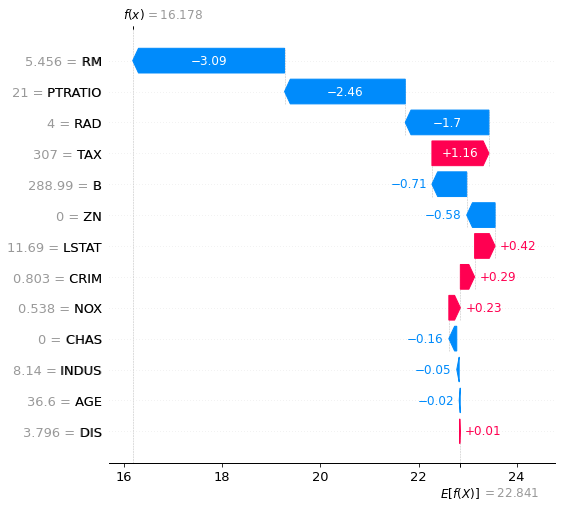

In [14]:
shap.plots.waterfall(shap_values[sample_ind], max_display=14)

### Additive regression model

In [4]:
from interpret.glassbox import ExplainableBoostingClassifier

ModuleNotFoundError: No module named 'interpret'